In [2]:
from SeismicReduction import *
import pickle
import torch.nn as nn

# load data
file_pi2 = open('../pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [3]:
### Processor
processor = Processor(dataholder)
input1 = processor(flatten=[True, 12, 52], normalise=True)

Processor has created an output with shape:  (25351, 2, 64)


In [4]:
bvae = BVaeModel(input1)

ModelAgent initialised


## Run $\beta$-VAE model with array of $\beta$ parameters:

In [10]:
import copy 

betas = [0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10]

models = [i for i in range(len(betas))]
ELBO = [i for i in range(len(betas))]

for count, i in enumerate(betas):
        bvae.reduce(epochs=300, hidden_size=2, lr=0.005, beta=i, plot_loss=False)
        bvae.to_2d()
        model = copy.deepcopy(bvae)
        models[count] = model
        print(count + 1, '/', len(betas))

/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


NOTE: embedding already reduced to 2D latent space, UMAP will not be run
1 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
2 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
3 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
4 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
5 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
6 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
7 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
8 / 9
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
9 / 9


## Visualise results in ordered figure:

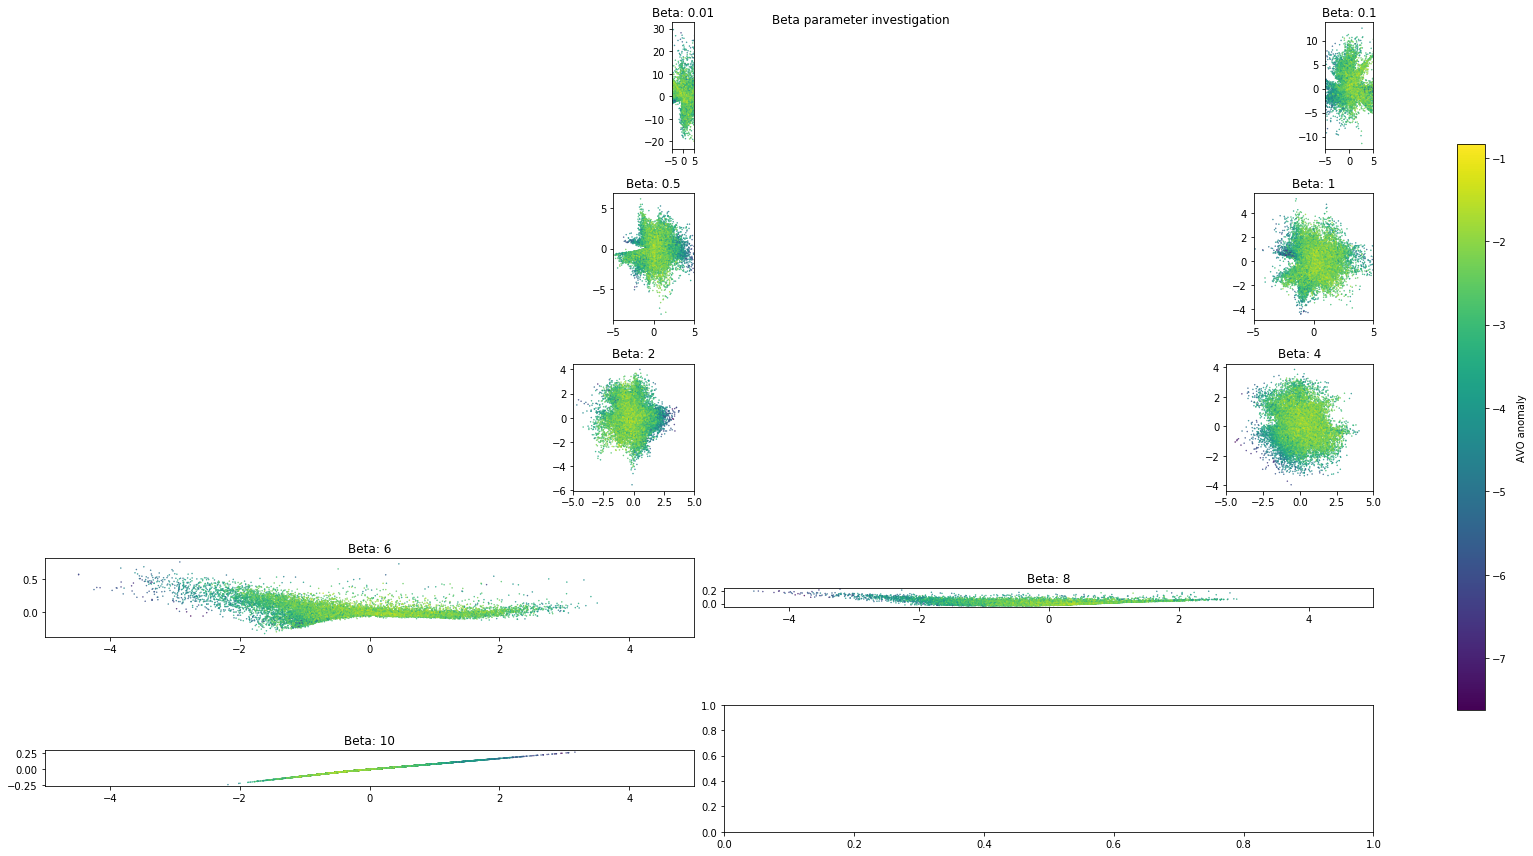

In [11]:
def plot_agent(model, attr='FF', ax=False, count=False):
    ax.set(title='Beta: {}'.format(betas[count]),
           aspect='equal', xlim=(-5, 5) )
    scatter = ax.scatter(model.two_dimensions[:, 0], model.two_dimensions[:, 1],
                         s=0.2,
                         c=model.attributes[attr])
    return scatter


# axes are in a two-dimensional array, indexed by [row, col]
fig, ax = plt.subplots(len(betas)//2 + 1, 2, figsize=(24, 12), sharex=False, sharey=False)


fig.suptitle('Beta parameter investigation')
fig.frameon = True

for count, i in enumerate(betas):
    a = plot_agent(models[count], ax=ax[int(count//2),int(count%2)], count=count)

fig.tight_layout()
cbar = fig.colorbar(a, ax=ax.ravel().tolist(), shrink=0.7, orientation='vertical')
cbar.set_label(label='AVO anomaly', rotation=90, labelpad=10)


plt.show()

7
8


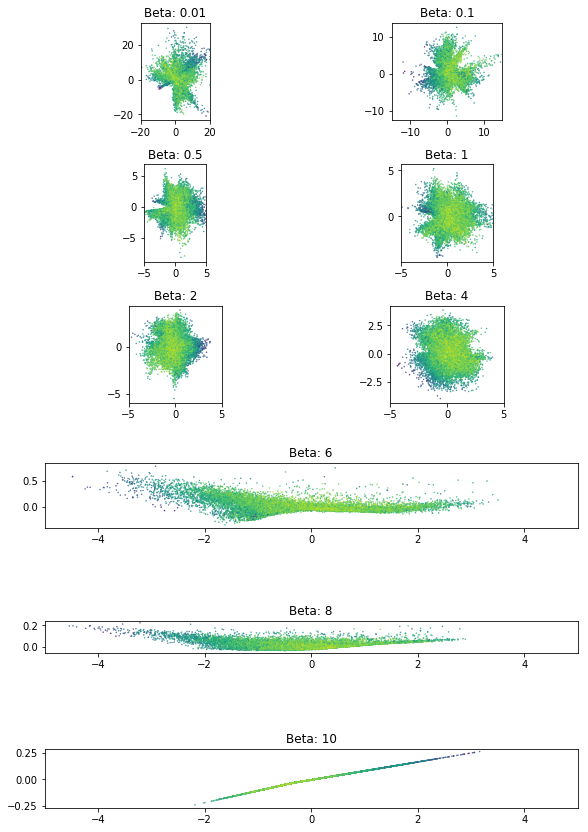

In [45]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        a = plot_agent(models[i], ax=ax, count=i)
        if i > 6:
            print(i)
            ax.set_aspect(2)
    return a

fig = plt.figure(constrained_layout=False, figsize=(8.27, 11.69))

gs = GridSpec(6, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, :])
ax8 = fig.add_subplot(gs[4, :])
ax9 = fig.add_subplot(gs[5, :])


a = format_axes(fig)


ax1.set_xlim(-20,20)
ax2.set_xlim(-15,15)

fig.tight_layout()

plt.savefig('../../../all figures/beta_param.png', bbox_inches = "tight")